#                               COVID-19 - Outbreak Prediction in India and Worldwide

In [1]:
##About COVID-19

The **coronavirus (COVID-19)** pandemic has spread across 213 countries infecting 2 crores people and killing 7 lakh so far. In India, as many as 1.5 crore COVID-19 cases have been reported so far. Of these, 10 lakh have recovered and 10 thousands have died. 

On March 24, Prime Minister Narendra Modi First time annouced that the country would go under 21-day lackdown to combat the spread of the virus.
Infections are rapidly rising in Italy, France, Germany, Spain, United Kingdom and the United States. It has has a massive impact on the global economy and stock markets

The outbreak of COVID-19 has developed into a major international crisis, and it influenced important aspects of daily life. For example in India:

- **Travel:** Complete lockdown no domestic or international flights are allowed in India for till Lockdown as decided by Ministry of Civil Aviation.
- **Grocery stores:** In highly affected areas, people are starting to stock up on essential goods leading to shortage of essential stuff.
- **Students have very much difficulties in this panedmic**   

**Corona Virus Explained in Simple Terms:**
- Let's say Raghav got infected yesterday, but he won't know it untill next 14 days
- Raghav thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

##Problem Statement:

As the coronavirus outbreak continues to spread in the country, the question that we as Indians are trying to answer is : 

**"Will India be able to tackle this pandemic or are we going to witness another Italy/ S.Korea/ Wuhan?"**
### Goal:
We need a strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.
###Tasks to be performed:
- Analysing the present condition in India
- Is this trend similar to Italy/S. Korea/ Wuhan
- Exploring the world wide data
- Forecasting the world wide COVID-19 cases using Prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize'] =10,12

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Learn how to read a .xls file by creating a dataframe using pandas
df=pd.read_csv('_covid_19_india.csv')
df_india=df.copy()
df.head

<bound method NDFrame.head of        Sno      Date     Time                      State/UnionTerritory  \
0        1  30/01/20  6:00 PM                                    Kerala   
1        2  31/01/20  6:00 PM                                    Kerala   
2        3  01/02/20  6:00 PM                                    Kerala   
3        4  02/02/20  6:00 PM                                    Kerala   
4        5  03/02/20  6:00 PM                                    Kerala   
5        6  04/02/20  6:00 PM                                    Kerala   
6        7  05/02/20  6:00 PM                                    Kerala   
7        8  06/02/20  6:00 PM                                    Kerala   
8        9  07/02/20  6:00 PM                                    Kerala   
9       10  08/02/20  6:00 PM                                    Kerala   
10      11  09/02/20  6:00 PM                                    Kerala   
11      12  10/02/20  6:00 PM                                    Keral

In [4]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

In [5]:
df.drop(['Sno'],axis=1,inplace=True)
df.dropna(axis=0,how='any',inplace=True)

In [6]:
df['ConfirmedIndianNational'] = pd.to_numeric(df['ConfirmedIndianNational'], errors='coerce')
df['ConfirmedForeignNational'] = pd.to_numeric(df['ConfirmedForeignNational'], errors='coerce')

In [7]:
df.fillna(0)

Date     Time                      State/UnionTerritory  \
0     30/01/20  6:00 PM                                    Kerala   
1     31/01/20  6:00 PM                                    Kerala   
2     01/02/20  6:00 PM                                    Kerala   
3     02/02/20  6:00 PM                                    Kerala   
4     03/02/20  6:00 PM                                    Kerala   
5     04/02/20  6:00 PM                                    Kerala   
6     05/02/20  6:00 PM                                    Kerala   
7     06/02/20  6:00 PM                                    Kerala   
8     07/02/20  6:00 PM                                    Kerala   
9     08/02/20  6:00 PM                                    Kerala   
10    09/02/20  6:00 PM                                    Kerala   
11    10/02/20  6:00 PM                                    Kerala   
12    11/02/20  6:00 PM                                    Kerala   
13    12/02/20  6:00 PM                                    Kerala   
14    13/02/20  6:00 PM                                    Kerala   
15    14/02/20  6:00 PM                                    Kerala   
16    15/02/20  6:00 PM                                    Kerala   
17    16/02/20  6:00 PM                                    Kerala   
18    17/02/20  6:00 PM                                    Kerala   
19    18/02/20  6:00 PM                                    Kerala   
20    19/02/20  6:00 PM                                    Kerala   
21    20/02/20  6:00 PM                                    Kerala   
22    21/02/20  6:00 PM                                    Kerala   
23    22/02/20  6:00 PM                                    Kerala   
24    23/02/20  6:00 PM                                    Kerala   
25    24/02/20  6:00 PM                                    Kerala   
26    25/02/20  6:00 PM                                    Kerala   
27    26/02/20  6:00 PM                                    Kerala   
28    27/02/20  6:00 PM                                    Kerala   
29    28/02/20  6:00 PM                                    Kerala   
...        ...      ...                                       ...   
4431  24/07/20  8:00 AM                                Chandigarh   
4432  24/07/20  8:00 AM                              Chhattisgarh   
4433  24/07/20  8:00 AM  Dadra and Nagar Haveli and Daman and Diu   
4434  24/07/20  8:00 AM                                     Delhi   
4435  24/07/20  8:00 AM                                       Goa   
4436  24/07/20  8:00 AM                                   Gujarat   
4437  24/07/20  8:00 AM                                   Haryana   
4438  24/07/20  8:00 AM                          Himachal Pradesh   
4439  24/07/20  8:00 AM                         Jammu and Kashmir   
4440  24/07/20  8:00 AM                                 Jharkhand   
4441  24/07/20  8:00 AM                                 Karnataka   
4442  24/07/20  8:00 AM                                    Kerala   
4443  24/07/20  8:00 AM                                    Ladakh   
4444  24/07/20  8:00 AM                            Madhya Pradesh   
4445  24/07/20  8:00 AM                               Maharashtra   
4446  24/07/20  8:00 AM                                   Manipur   
4447  24/07/20  8:00 AM                                 Meghalaya   
4448  24/07/20  8:00 AM                                   Mizoram   
4449  24/07/20  8:00 AM                                  Nagaland   
4450  24/07/20  8:00 AM                                    Odisha   
4451  24/07/20  8:00 AM                                Puducherry   
4452  24/07/20  8:00 AM                                    Punjab   
4453  24/07/20  8:00 AM                                 Rajasthan   
4454  24/07/20  8:00 AM                                    Sikkim   
4455  24/07/20  8:00 AM                                Tamil Nadu   
4456  24/07/20  8:00 AM                                 Telangana   
4457  24

In [8]:
df.style.background_gradient(cmap='Blues')

In [9]:
#Total case is the total number of confirmed cases (Indian National + Foreign National)


df['Total cases'] = df['ConfirmedIndianNational'] + df['ConfirmedForeignNational']
df['Total cases'] = pd.to_numeric(df['Total cases'], errors='coerce')
total_cases = df['Total cases'].sum()
print('Total no. of confirmed cases across INDIA: ',total_cases)

Total no. of confirmed cases across INDIA:  6103.0


In [10]:
print (df.dtypes)

Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational     float64
ConfirmedForeignNational    float64
Cured                         int64
Deaths                        int64
Confirmed                     int64
Total cases                 float64
dtype: object


In [11]:
print('Total Death and cured cases in india on (22nd March,2020) : ',(df['Cured'].sum()+df['Deaths'].sum()))

Total Death and cured cases in india on (22nd March,2020) :  21168914


In [12]:
df.loc[65]

Date                        08/03/20
Time                         6:00 PM
State/UnionTerritory          Ladakh
ConfirmedIndianNational            2
ConfirmedForeignNational           0
Cured                              0
Deaths                             0
Confirmed                          2
Total cases                        2
Name: 65, dtype: object

In [13]:
df['Total Active'] = df['Total cases']-df['Deaths'] - df['Cured']
#total_active = df['Total Active'].sum()
#print('Total active cases across india on (22nd March,2020) : ',total_active)

In [14]:
#Active cases according to states and UT

Tot_cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_cases.style.background_gradient(cmap='Reds')

In [15]:
df.rename(columns={'State/UnionTerritory':'Name of State / UT'}, inplace=True)
df

Date     Time                        Name of State / UT  \
0     30/01/20  6:00 PM                                    Kerala   
1     31/01/20  6:00 PM                                    Kerala   
2     01/02/20  6:00 PM                                    Kerala   
3     02/02/20  6:00 PM                                    Kerala   
4     03/02/20  6:00 PM                                    Kerala   
5     04/02/20  6:00 PM                                    Kerala   
6     05/02/20  6:00 PM                                    Kerala   
7     06/02/20  6:00 PM                                    Kerala   
8     07/02/20  6:00 PM                                    Kerala   
9     08/02/20  6:00 PM                                    Kerala   
10    09/02/20  6:00 PM                                    Kerala   
11    10/02/20  6:00 PM                                    Kerala   
12    11/02/20  6:00 PM                                    Kerala   
13    12/02/20  6:00 PM                                    Kerala   
14    13/02/20  6:00 PM                                    Kerala   
15    14/02/20  6:00 PM                                    Kerala   
16    15/02/20  6:00 PM                                    Kerala   
17    16/02/20  6:00 PM                                    Kerala   
18    17/02/20  6:00 PM                                    Kerala   
19    18/02/20  6:00 PM                                    Kerala   
20    19/02/20  6:00 PM                                    Kerala   
21    20/02/20  6:00 PM                                    Kerala   
22    21/02/20  6:00 PM                                    Kerala   
23    22/02/20  6:00 PM                                    Kerala   
24    23/02/20  6:00 PM                                    Kerala   
25    24/02/20  6:00 PM                                    Kerala   
26    25/02/20  6:00 PM                                    Kerala   
27    26/02/20  6:00 PM                                    Kerala   
28    27/02/20  6:00 PM                                    Kerala   
29    28/02/20  6:00 PM                                    Kerala   
...        ...      ...                                       ...   
4431  24/07/20  8:00 AM                                Chandigarh   
4432  24/07/20  8:00 AM                              Chhattisgarh   
4433  24/07/20  8:00 AM  Dadra and Nagar Haveli and Daman and Diu   
4434  24/07/20  8:00 AM                                     Delhi   
4435  24/07/20  8:00 AM                                       Goa   
4436  24/07/20  8:00 AM                                   Gujarat   
4437  24/07/20  8:00 AM                                   Haryana   
4438  24/07/20  8:00 AM                          Himachal Pradesh   
4439  24/07/20  8:00 AM                         Jammu and Kashmir   
4440  24/07/20  8:00 AM                                 Jharkhand   
4441  24/07/20  8:00 AM                                 Karnataka   
4442  24/07/20  8:00 AM                                    Kerala   
4443  24/07/20  8:00 AM                                    Ladakh   
4444  24/07/20  8:00 AM                            Madhya Pradesh   
4445  24/07/20  8:00 AM                               Maharashtra   
4446  24/07/20  8:00 AM                                   Manipur   
4447  24/07/20  8:00 AM                                 Meghalaya   
4448  24/07/20  8:00 AM                                   Mizoram   
4449  24/07/20  8:00 AM                                  Nagaland   
4450  24/07/20  8:00 AM                                    Odisha   
4451  24/07/20  8:00 AM                                Puducherry   
4452  24/07/20  8:00 AM                                    Punjab   
4453  24/07/20  8:00 AM                                 Rajasthan   
4454  24/07/20  8:00 AM                                    Sikkim   
4455  24/07/20  8:00 AM                                Tamil Nadu   
4456  24/07/20  8:00 AM                                 Telangana   
4457  24

In [53]:
#create zoomable map using folium

df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

KeyError: 'Name of State / UT'

In [50]:
#commulative corona cases in india
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')

fig.show()




In [20]:
import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [21]:
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

###Visualization Inference
- Confirmed cases in India is rising exponentially with no fixed pattern (Very less test in India)
- Confirmed cases in Italy is rising exponentially with certain fixed pattern
- Confirmed cases in S.Korea is rising gradually
- There has been only 3 confirmed cases in Wuhan since last week. They have almost controlled the COVID-19
 

In [22]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

#fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                    marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [23]:
dbd_India.fillna(0)

Date  Total Cases  New Cases  Days after surpassing 100 cases
0  2020-01-30            1          1                              0.0
1  2020-01-31            1          0                              0.0
2  2020-02-01            1          0                              0.0
3  2020-02-02            2          1                              0.0
4  2020-02-03            3          1                              0.0
5  2020-02-04            3          0                              0.0
6  2020-02-05            3          0                              0.0
7  2020-02-06            3          0                              0.0
8  2020-02-07            3          0                              0.0
9  2020-02-08            3          0                              0.0
10 2020-02-09            3          0                              0.0
11 2020-02-10            3          0                              0.0
12 2020-02-11            3          0                              0.0
13 2020-02-12            3          0                              0.0
14 2020-02-13            3          0                              0.0
15 2020-02-14            3          0                              0.0
16 2020-02-15            3          0                              0.0
17 2020-02-16            3          0                              0.0
18 2020-02-17            3          0                              0.0
19 2020-02-18            3          0                              0.0
20 2020-02-19            3          0                              0.0
21 2020-02-20            3          0                              0.0
22 2020-02-21            3          0                              0.0
23 2020-02-22            3          0                              0.0
24 2020-02-23            3          0                              0.0
25 2020-02-24            3          0                              0.0
26 2020-02-25            3          0                              0.0
27 2020-02-26            3          0                              0.0
28 2020-02-27            3          0                              0.0
29 2020-02-28            3          0                              0.0
30 2020-02-29            3          0                              0.0
31 2020-03-01            3          0                              0.0
32 2020-03-02            6          3                              0.0
33 2020-03-03            9          3                              0.0
34 2020-03-04           28         19                              0.0
35 2020-03-05           30          2                              0.0
36 2020-03-06           31          1                              0.0
37 2020-03-07           34          3                              0.0
38 2020-03-08           39          5                              0.0
39 2020-03-09           43          4                              0.0
40 2020-03-10           56         13                              0.0
41 2020-03-11           62          6                              0.0
42 2020-03-12           73         11                              0.0
43 2020-03-13           82          9                              0.0
44 2020-03-14          102         20                              0.0
45 2020-03-15          113         11                              1.0
46 2020-03-16          119          6                              2.0
47 2020-03-17          142         23                              3.0
48 2020-03-18          156         14                              4.0
49 2020-03-19          194         38                              5.0
50 2020-03-20          244         50                              6.0
51 2020-03-21          330         86                              7.0
52 2020-03-22          396         66                              8.0
53 2020-03-23          499        103                              9.0
54 2020-03-24          536         37                             10.0
55 2020-03-25          562       

In [24]:
title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()

# **Visualization Inference:** 

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country. 
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea

In [25]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [26]:
df

Province/State                Country      Lat      Long  \
0                               NaN               Thailand  15.0000  101.0000   
1                               NaN                  Japan  36.0000  138.0000   
2                               NaN              Singapore   1.2833  103.8333   
3                               NaN                  Nepal  28.1667   84.2500   
4                               NaN               Malaysia   2.5000  112.5000   
5                  British Columbia                 Canada  49.2827 -123.1207   
6                   New South Wales              Australia -33.8688  151.2093   
7                          Victoria              Australia -37.8136  144.9631   
8                        Queensland              Australia -28.0167  153.4000   
9                               NaN               Cambodia  11.5500  104.9167   
10                              NaN              Sri Lanka   7.0000   81.0000   
11                              NaN                Germany  51.0000    9.0000   
12                              NaN                Finland  64.0000   26.0000   
13                              NaN   United Arab Emirates  24.0000   54.0000   
14                              NaN            Philippines  13.0000  122.0000   
15                              NaN                  India  21.0000   78.0000   
16                              NaN                  Italy  43.0000   12.0000   
17                              NaN                 Sweden  63.0000   16.0000   
18                              NaN                  Spain  40.0000   -4.0000   
19                  South Australia              Australia -34.9285  138.6007   
20                              NaN                Belgium  50.8333    4.0000   
21                              NaN                  Egypt  26.0000   30.0000   
22            From Diamond Princess              Australia  35.4437  139.6380   
23                              NaN                Lebanon  33.8547   35.8623   
24                              NaN                   Iraq  33.0000   44.0000   
25                              NaN                   Oman  21.0000   57.0000   
26                              NaN            Afghanistan  33.0000   65.0000   
27                              NaN                Bahrain  26.0275   50.5500   
28                              NaN                 Kuwait  29.5000   47.7500   
29                              NaN                Algeria  28.0339    1.6596   
...                             ...                    ...      ...       ...   
19190                           NaN             Cabo Verde  16.5388  -23.0418   
19191                  Sint Maarten            Netherlands  18.0425  -63.0548   
19192                           NaN                  Niger  17.6078    8.0817   
19193                           NaN       Papua New Guinea  -6.3150  143.9555   
19194                   Isle of Man         United Kingdom  54.2361   -4.5481   
19195                           NaN               Zimbabwe -20.0000   30.0000   
19196         Northwest Territories                 Canada  64.8255 -124.8457   
19197                           NaN             Cape Verde  15.1111  -23.6167   
19198                           NaN             East Timor  -8.5500  125.5600   
19199                           NaN                Eritrea  15.1794   39.7823   
19200                           NaN                 Uganda   1.0000   32.0000   
19201                           NaN               Dominica  15.4150  -61.3710   
19202                           NaN                Grenada  12.1165  -61.6790   
19203                           NaN             Mozambique -18.6657   35.5296   
19204                           NaN                  Syria  34.8021   38.9968   
19205                           NaN            Timor-Leste  -8.8742  125.7275   
19206                           NaN             Guadeloupe  16.2650  -61.5510   
19207                           NaN                R

In [27]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

Date    Country                Province/State  Confirmed  Deaths  \
0 2020-01-22  Australia  Australian Capital Territory        0.0     0.0   
1 2020-01-22  Australia         From Diamond Princess        0.0     0.0   
2 2020-01-22  Australia               New South Wales        0.0     0.0   
3 2020-01-22  Australia            Northern Territory        0.0     0.0   
4 2020-01-22  Australia                    Queensland        0.0     0.0   

   Recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [28]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

Date  Confirmed  Deaths  Recovered
0  2020-01-22        0.0     0.0        0.0
1  2020-01-23        0.0     0.0        0.0
2  2020-01-24        0.0     0.0        0.0
3  2020-01-25        0.0     0.0        0.0
4  2020-01-26        0.0     0.0        0.0
5  2020-01-27        0.0     0.0        0.0
6  2020-01-28        0.0     0.0        0.0
7  2020-01-29        0.0     0.0        0.0
8  2020-01-30        1.0     0.0        0.0
9  2020-01-31        1.0     0.0        0.0
10 2020-02-01        1.0     0.0        0.0
11 2020-02-02        2.0     0.0        0.0
12 2020-02-03        3.0     0.0        0.0
13 2020-02-04        3.0     0.0        0.0
14 2020-02-05        3.0     0.0        0.0
15 2020-02-06        3.0     0.0        0.0
16 2020-02-07        3.0     0.0        0.0
17 2020-02-08        3.0     0.0        0.0
18 2020-02-09        3.0     0.0        0.0
19 2020-02-10        3.0     0.0        0.0
20 2020-02-11        3.0     0.0        0.0
21 2020-02-12        3.0     0.0        0.0
22 2020-02-13        3.0     0.0        0.0
23 2020-02-14        3.0     0.0        0.0
24 2020-02-15        3.0     0.0        0.0
25 2020-02-16        3.0     0.0        3.0
26 2020-02-17        3.0     0.0        3.0
27 2020-02-18        3.0     0.0        3.0
28 2020-02-19        3.0     0.0        3.0
29 2020-02-20        3.0     0.0        3.0
..        ...        ...     ...        ...
32 2020-02-23        3.0     0.0        3.0
33 2020-02-24        3.0     0.0        3.0
34 2020-02-25        3.0     0.0        3.0
35 2020-02-26        3.0     0.0        3.0
36 2020-02-27        3.0     0.0        3.0
37 2020-02-28        3.0     0.0        3.0
38 2020-02-29        3.0     0.0        3.0
39 2020-03-01        3.0     0.0        3.0
40 2020-03-02        5.0     0.0        3.0
41 2020-03-03        5.0     0.0        3.0
42 2020-03-04       28.0     0.0        3.0
43 2020-03-05       30.0     0.0        3.0
44 2020-03-06       31.0     0.0        3.0
45 2020-03-07       34.0     0.0        3.0
46 2020-03-08       39.0     0.0        3.0
47 2020-03-09       43.0     0.0        3.0
48 2020-03-10       56.0     0.0        4.0
49 2020-03-11       62.0     1.0        4.0
50 2020-03-12       73.0     1.0        4.0
51 2020-03-13       82.0     2.0        4.0
52 2020-03-14      102.0     2.0        4.0
53 2020-03-15      113.0     2.0       13.0
54 2020-03-16      119.0     2.0       13.0
55 2020-03-17      142.0     3.0       14.0
56 2020-03-18      156.0     3.0       14.0
57 2020-03-19      194.0     4.0       15.0
58 2020-03-20      244.0     5.0       20.0
59 2020-03-21      330.0     4.0       23.0
60 2020-03-22      396.0     7.0       27.0
61 2020-03-23      396.0     7.0       27.0

[62 rows x 4 columns]

In [29]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

Lat       Long  Confirmed  Deaths  Recovered
Date                                                          
2020-01-22  7777.4793  1639.7021      554.0    17.0       28.0
2020-01-23  7777.4793  1639.7021      652.0    18.0       30.0
2020-01-24  7777.4793  1639.7021      939.0    26.0       36.0
2020-01-25  7777.4793  1639.7021     1432.0    42.0       39.0
2020-01-26  7777.4793  1639.7021     2113.0    56.0       52.0

## 3.1 Visualizing: Worldwide NCOVID-19 cases  

In [30]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [31]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

#Part 4: Forecasting Total Number of Cases Worldwide

In [32]:
from fbprophet import Prophet

In [33]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [34]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [35]:
confirmed.tail()

ds         y
57 2020-03-19  242708.0
58 2020-03-20  272166.0
59 2020-03-21  304524.0
60 2020-03-22  335955.0
61 2020-03-23  336004.0

In [36]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [37]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  355136.872975  335687.392083  375311.152441
65 2020-03-27  372235.326939  352603.168445  393044.091057
66 2020-03-28  388674.964143  368872.667216  408971.831262
67 2020-03-29  405307.954676  384758.905649  427610.561586
68 2020-03-30  418529.648467  396595.229577  441364.967242

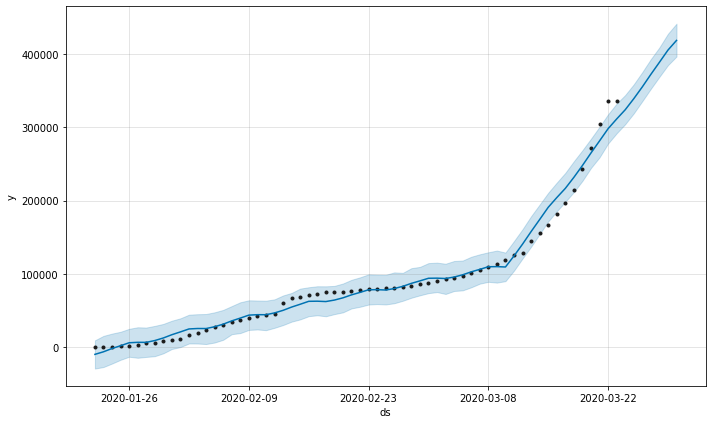

In [38]:
confirmed_forecast_plot = m.plot(forecast)

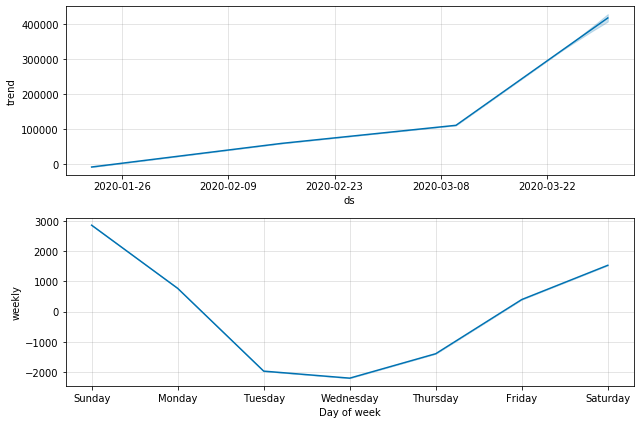

In [39]:
confirmed_forecast_plot =m.plot_components(forecast)

##4.2 Forecasting Worldwide Deaths using Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [40]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [41]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [42]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
64 2020-03-26  15411.877522  14352.782453  16367.022314
65 2020-03-27  16199.617603  15193.874558  17075.308420
66 2020-03-28  17006.904589  16029.363895  17971.173387
67 2020-03-29  17831.505383  16806.927835  18882.376761
68 2020-03-30  18490.986176  17424.569053  19551.044317

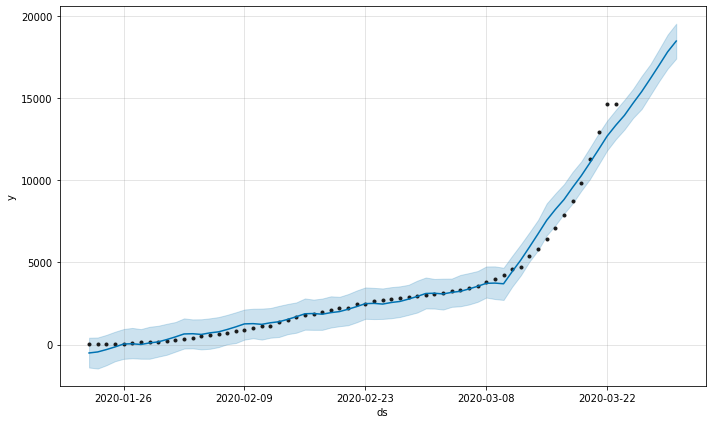

In [43]:
deaths_forecast_plot = m.plot(forecast)

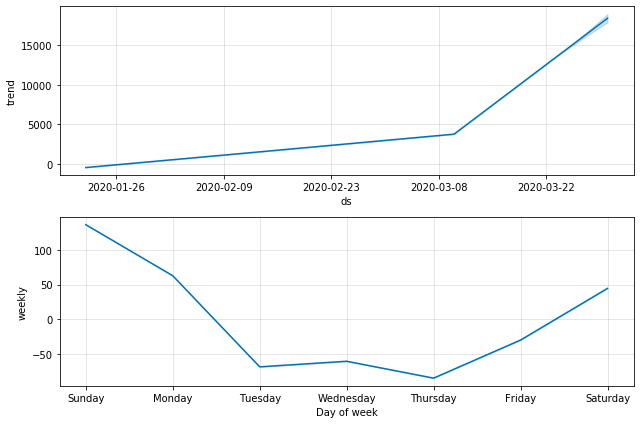

In [44]:
deaths_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [45]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [46]:
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  106835.927475  105814.406066  107870.897710
65 2020-03-27  107819.724210  106772.605673  108869.580143
66 2020-03-28  107971.074730  106945.493607  108959.335007
67 2020-03-29  106253.818952  105249.450922  107252.609244
68 2020-03-30  101633.075842  100613.009419  102644.975047

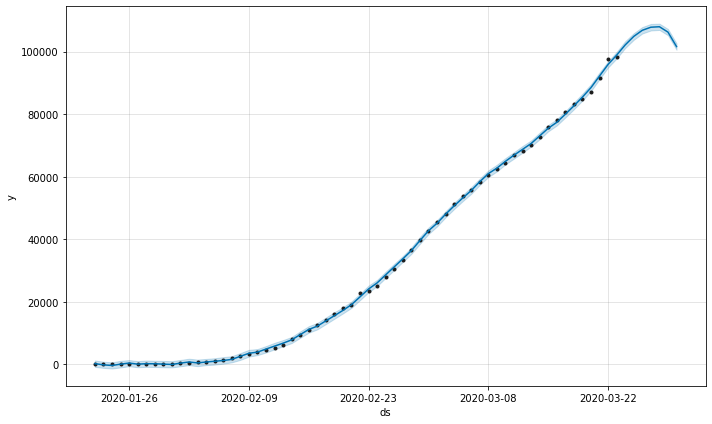

In [48]:
recovered_forecast_plot = m.plot(forecast)

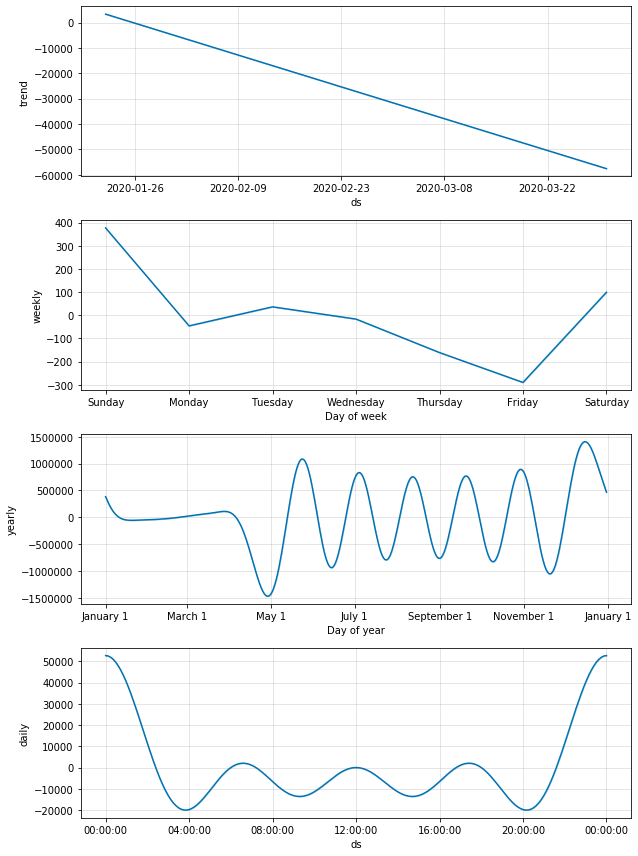

In [49]:
recovered_forecast_plot = m.plot_components(forecast)
